# [Python] EDA Assignment
#Taylor Maurer

<div class="alert alert-block alert-info">
The table in "global_temp_co2_nasa.csv" contains the global mean surface air temperature anomaly in deg C (Anomaly) and the global CO2 concentration in ppmv, henceforth referred to as Anomaly and CO2 respectively, for the years 1880-2004 (Source: http://data.giss.nasa.gov/gistemp/). The temperature is measured at a number of locations around the world and averaged annually, and then subtracted from a base period average (1951-1980) and the result reported as an anomaly. 

Download "global_temp_co2_nasa.csv" from Canvas/Files/Data
</div>

In [159]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<div class="alert alert-block alert-info">
    <b>Task 1:</b> Read data into a panda data frame. Please ensure the data was read in correctly by printing the first few and last few lines. Also print the number of rows and columns </div>


In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import *
from scipy import stats

In [161]:
myDataFrame = pd.read_csv('global_temp_co2_nasa.csv')

In [162]:
myDataFrame[0:10]

,Year,Anomaly,CO2
0,1880,-0.11,290.7
1,1881,-0.13,291.2
2,1882,-0.01,291.7
3,1883,-0.04,292.1
4,1884,-0.42,292.6
5,1885,-0.23,293
6,1886,-0.25,293.3
7,1887,-0.45,293.6
8,1888,-0.23,293.8
9,1889,0.04,294


In [163]:
dFShape = myDataFrame.shape
myDataFrame[dFShape[0] - 10:dFShape[0]+1]

,Year,Anomaly,CO2
129,2009,,
130,2010,,
131,2011,,
132,2012,,
133,2013,,
134,2014,,
135,2015,,
136,2016,,
137,2017,,
138,2018,,


In [164]:

print('Row number:', dFShape[0])
print('Col number:', dFShape[1])

Row number: 139
Col number: 3


<div class="alert alert-block alert-info">
    <b>Task 2:</b> Remove all rows that have missing data and save the cleaned data into a new data frame , verify by printing the first few and last few lines
</div>

In [165]:
myDataFrame.replace(' ', np.nan, inplace=True)
cleanedDataFrame = myDataFrame.dropna(axis='index',how='any')
dFShape = cleanedDataFrame.shape
cleanedDataFrame[0:10]

,Year,Anomaly,CO2
0,1880,-0.11,290.7
1,1881,-0.13,291.2
2,1882,-0.01,291.7
3,1883,-0.04,292.1
4,1884,-0.42,292.6
5,1885,-0.23,293
6,1886,-0.25,293.3
7,1887,-0.45,293.6
8,1888,-0.23,293.8
9,1889,0.04,294


In [166]:
cleanedDataFrame[dFShape[0]-10:dFShape[0]+1]


,Year,Anomaly,CO2
115,1995,0.47,360.9
116,1996,0.36,362.6
117,1997,0.4,363.8
118,1998,0.71,366.6
119,1999,0.43,368.3
120,2000,0.41,369.5
121,2001,0.56,371
122,2002,0.7,373.1
123,2003,0.66,375.6
124,2004,0.6,377.4


<div class="alert alert-block alert-info">
    <b>Task 3:</b> Calculate the summary statistics of location for "Anomaly", "CO2": mean, median, min, max, 1st quartile, 3rd quartile.
    </div>

In [167]:
anomalyData = pd.to_numeric(cleanedDataFrame['Anomaly'], downcast = 'float')
anomalyData

0     -0.11
1     -0.13
2     -0.01
3     -0.04
4     -0.42
       ... 
120    0.41
121    0.56
122    0.70
123    0.66
124    0.60
Name: Anomaly, Length: 125, dtype: float32

In [168]:
anomalyData.mean()

-0.006320002488791943

In [169]:
anomalyData.median()

-0.019999999552965164

In [170]:
anomalyData.min()

-0.550000011920929

In [171]:
anomalyData.max()

0.7099999785423279

In [172]:
anomalyData.quantile(q=.25)

-0.18000000715255737

In [173]:
anomalyData.quantile(q=.75)

0.11999999731779099

In [174]:
CO2Data = pd.to_numeric(cleanedDataFrame['CO2'], downcast = 'float')

In [175]:
CO2Data.mean()

317.2775573730469

In [176]:
CO2Data.median()

310.20001220703125

In [177]:
CO2Data.min()

290.70001220703125

In [178]:
CO2Data.max()

377.3999938964844

In [179]:
CO2Data.quantile(q=.25)

300.1000061035156

In [180]:
CO2Data.quantile(q=.75)

328.79998779296875

<div class="alert alert-block alert-info">
    <b>Task 4:</b> Calculate the summary statistics of spread for "Anomaly", "CO2": standard deviation, variance, range. 
</div

In [181]:
anomalyData.std()

0.25660479068756104

In [182]:
anomalyData.var()

0.0658460259437561

In [183]:
anomalyData.max() - anomalyData.min()

1.2599999904632568

In [184]:
CO2Data.std()

22.947187423706055

In [185]:
CO2Data.var()

526.5734252929688

In [186]:
CO2Data.max() - CO2Data.min()

86.69998168945312

<div class="alert alert-block alert-info">
    <b> Task 5:</b> Plot histogram of frequencies, probability density and empirical cdf plots of Anomaly and Co2. Record your observations
</div>

Text(0.5, 0, 'deg C')

Text(0.5, 1.0, 'Anomaly')

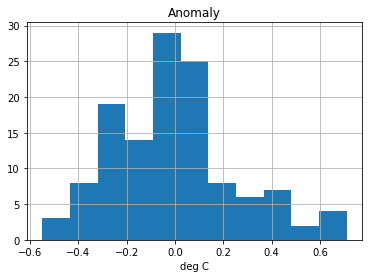

In [187]:
ax = anomalyData.hist(bins = round(sqrt(anomalyData.size)))
ax.set_xlabel("deg C")
ax.set_title("Anomaly")

Text(0.5, 0, 'ppmv')

Text(0.5, 1.0, 'CO2')

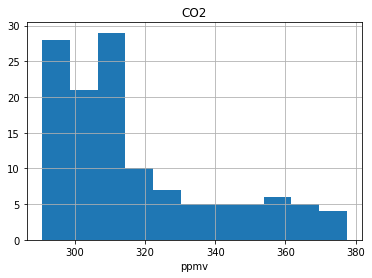

In [188]:
ax = CO2Data.hist(bins = round(sqrt(anomalyData.size)))
ax.set_xlabel("ppmv")
ax.set_title("CO2")

Text(0.5, 0, 'deg C')

Text(0.5, 1.0, 'Anomaly')

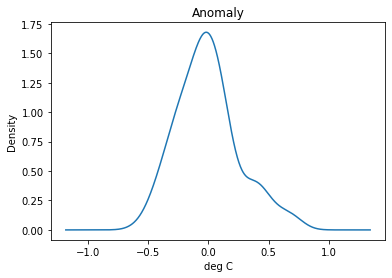

In [189]:
ax =anomalyData.plot.density()
ax.set_xlabel("deg C")
ax.set_title("Anomaly")

Text(0.5, 0, 'ppmv')

Text(0.5, 1.0, 'CO2')

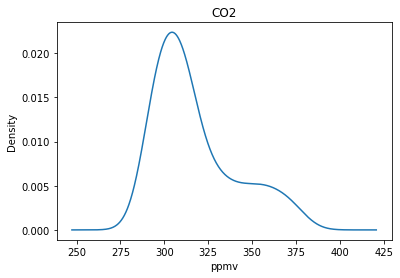

In [190]:
ax =CO2Data.plot.density()
ax.set_xlabel("ppmv")
ax.set_title("CO2")

Text(0.5, 17.200000000000003, 'deg C')

Text(0.5, 1, 'Anomaly')

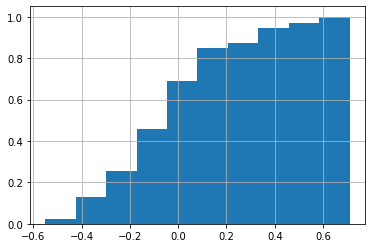

In [191]:
anomalyData.hist(cumulative=True, density=1)
ax.set_xlabel("deg C")
ax.set_title("Anomaly")

Text(0.5, 17.200000000000003, 'ppmv')

Text(0.5, 1, 'CO2')

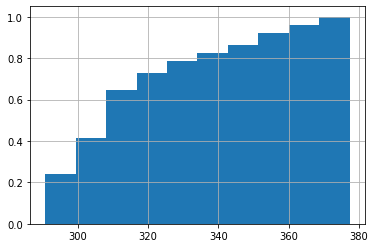

In [192]:
CO2Data.hist(cumulative=True, density=1)
ax.set_xlabel("ppmv")
ax.set_title("CO2")

It is clear that the anomaly data is centered around 0 degrees celsius, but the CO2 data is left skewed. This is apparent in both the histogram data and the PDF. The same point can be made from the CDF as the slope of the CDF for the Anomaly data is close to linear, but the CO2 data is logarithmic. The latter indicating that most of the data observations occur to the left of the mean, ie. left skewed.

<div class="alert alert-block alert-info">
    <b> Task 6:</b> Construct Time series plot of Anomaly and CO2. Record your observations 
   </div>

Text(0, 0.5, 'Deg C')

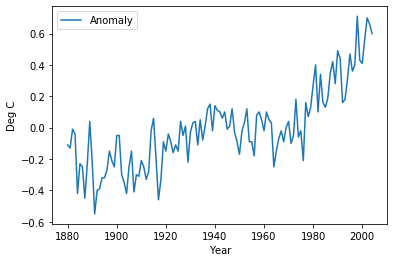

In [198]:
yearData = pd.to_numeric(cleanedDataFrame['Year'], downcast = 'integer')
timeAnomalyData = pd.concat([yearData,anomalyData], axis=1)
ax =timeAnomalyData.plot(x='Year', y='Anomaly')
ax.set_ylabel('Deg C')

Text(0, 0.5, 'ppmv')

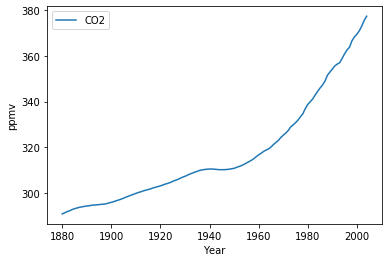

In [201]:
timeCO2Data = pd.concat([yearData,CO2Data], axis=1)
ax =timeCO2Data.plot(x='Year', y='CO2')
ax.set_ylabel('ppmv')

The trend is that both CO2 is increasing as is the Anomaly temperature as time is increasing. One can even get a sense of the general trend. With both data samples nearing an exponential curve. 

<div class="alert alert-block alert-info">
    <b>Task 7:</b> Subset of data into pre 1950 and post 1950 and construct boxplot for CO2. Record your observations 
    </div>

Text(0, 0.5, 'ppmv')

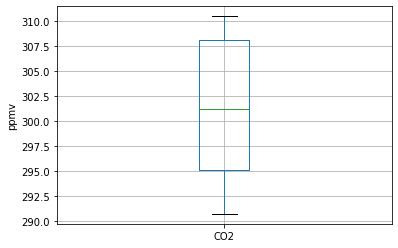

In [206]:
pre1950CO2Data_i = timeCO2Data['Year'] < 1950
post1950CO2Data_i= timeCO2Data['Year'] > 1950
pre1950CO2Data = timeCO2Data[pre1950CO2Data_i]
post1950CO2Data = timeCO2Data[post1950CO2Data_i]
ax = pre1950CO2Data.boxplot(column='CO2')
ax.set_ylabel('ppmv')
ax.set_title('Pre 1950')

Text(0, 0.5, 'ppmv')

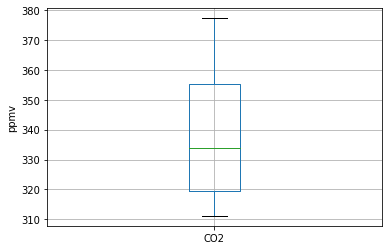

In [207]:
ax = post1950CO2Data.boxplot(column='CO2')
ax.set_ylabel('ppmv')
ax.set_title('Post 1950')

Again it is apparent that the CO2 concentration has increased with time as the whole box has shifted from pre-1950 to post-1950 in an upwards direction. Additionally in post-1950 the variation is larger as apparent as the different between the smallest and largest whiskers of the two plots. This is also seen by the expanding of the difference between q1 and q3 from pre-1950 to post 1950.

<div class="alert alert-block alert-info">
    <b>Task 8:</b> Bi-variate scatter plot, Calculate the Correlation coefficient between Anomaly and CO2. Record your observations
    </div>

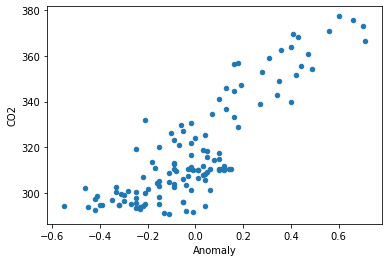

In [209]:
anomalyCO2Data = pd.concat([anomalyData,CO2Data], axis=1)
anomalyCO2Data.plot.scatter(x='Anomaly',y='CO2')

In [211]:
anomalyCO2Data.corr(method='pearson')

,Anomaly,CO2
Anomaly,1.000000,0.852334
CO2,0.852334,1.000000


The correlation coefficient is 0.85 which is somewhat close to 1. This indicates a positive correlation between Anomaly and CO2 so as Anomaly increased as did CO2. This can also be seen within the plot. This could mean that the increasing Anomaly could be causing the increasing CO2 (or vice-a-versa), it could mean there's another factor causing the increase of both the Anomaly and CO2, or there could be completely seperate reasons why CO2 and Anomaly are increasing. Correlation does not mean causation.

<div class="alert alert-block alert-info">
    <b> Task 9:</b> Verify the distribution using Probability plots
   </div>

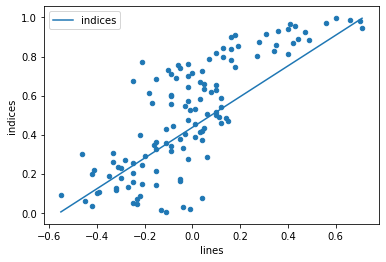

In [248]:
sortedAnomalyData = anomalyData.sort_values()

#create index vector for line and as the indices are jumbled with sort
newIndexVect = np.linspace(1, sortedAnomalyData.size, sortedAnomalyData.size)
#perform probability plot math
newIndexVect = (newIndexVect - .5)/sortedAnomalyData.size

#create vector that spans from min to max to create your best fit line
lineVect = np.linspace(sortedAnomalyData.min(), sortedAnomalyData.max(), sortedAnomalyData.size)
lineCol = pd.DataFrame(data=lineVect, columns=["lines"])
newIndexCol = pd.DataFrame(data=newIndexVect, columns=["indices"])

#concatenate anomalydata with new in order indices
probAnomalyData = pd.concat([sortedAnomalyData, newIndexCol], axis=1)

#plot one
ax = probAnomalyData.plot.scatter(x='Anomaly',y="indices")
#concatenate the line with the same indices
lineData = pd.concat([lineCol, newIndexCol], axis=1)
#plot two
lineData.plot.line(x="lines", y ="indices", ax=ax)
ax.set_xlabel("deg C")
ax.set_ylabel("(j-.5)/n")
ax.set_title("Anomaly Probability Plot")

This is somewhat representative of a pretty good distribution. Note: this follows the distribution described in the book so a normal distribution (the line). 

Text(0.5, 0, 'ppmv')

Text(0, 0.5, '(j-.5)/n')

Text(0.5, 1.0, 'CO2 Probability Plot')

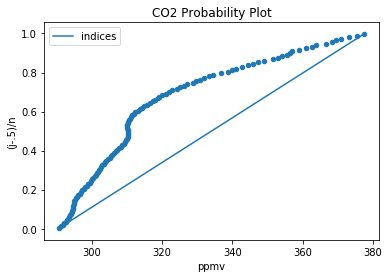

In [250]:
sortedCO2Data = CO2Data.sort_values()

#create index vector for line and as the indices are jumbled with sort
newIndexVect = np.linspace(1, sortedCO2Data.size, sortedCO2Data.size)
#perform probability plot math
newIndexVect = (newIndexVect - .5)/sortedCO2Data.size

#create vector that spans from min to max to create your best fit line
lineVect = np.linspace(sortedCO2Data.min(), sortedCO2Data.max(), sortedCO2Data.size)
lineCol = pd.DataFrame(data=lineVect, columns=["lines"])
newIndexCol = pd.DataFrame(data=newIndexVect, columns=["indices"])

#concatenate anomalydata with new in order indices
probCO2Data = pd.concat([sortedCO2Data, newIndexCol], axis=1)

#plot one
ax = probCO2Data.plot.scatter(x='CO2',y="indices")
#concatenate the line with the same indices
lineData = pd.concat([lineCol, newIndexCol], axis=1)
#plot two
lineData.plot.line(x="lines", y ="indices", ax=ax)
ax.set_xlabel("ppmv")
ax.set_ylabel("(j-.5)/n")
ax.set_title("CO2 Probability Plot")

This doesn't follow the normal distribution that well. That's because it is left skewed as we saw earlier so you get lots of values to the left of the mean within the distribution, and not so many to the right. It looks like in general there's some bias away from the mean in general. 

<div class="alert alert-block alert-info">
    <b>Task 10:</b> Write out the updated dataset in a csv file "output_global_temp_co2_nasa.csv"
    </div>

In [251]:
cleanedDataFrame.to_csv('cleaned_global_temp_co2_nasa.csv')